<a href="https://colab.research.google.com/github/jchamilton75/UniversiteOuverte/blob/main/UO_2024_1_R%C3%A9ponses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Premier notebook: prise en main de python et premiers graphiques simples

## Initialisation du notebook


Dans un notebook Python, il y a des cellules qui peuvent être "code" ou "texte". Les cellules de code peuvent être reconnues par le "In[xx]" au début (xx est un nombre qui dépend de l'ordre d'exécution des cellules). Elles peuvent être exécutées en appuyant sur "Shift+Enter" et le code qu'elles contiennent est exécuté par la machine. S'il y a une sortie, elle est affichée dans une autre cellule en dessous de celle d'entrée, une cellule qui commence par "Out[xx]".

Avant de commencer, on a généralement besoin de configurer quelques paramètres pour le notebook afin que les graphiques soient beaux et que les bibliothèques habituelles soient importées. Cela est obtenu en exécutant la cellule ci-dessous:

In [ ]:
import sys
print("Using Python {}".format(sys.version_info[0]))

from pylab import *
import numpy as np
%matplotlib inline
from matplotlib import rc
from importlib import reload
rc('figure',figsize=(10,5))
rc('font',size=12)
rc('text',usetex=False)

Using Python 3


## Manipulations de données avec python

Commençons par faire une opération simple:

In [ ]:
2+5

7

Bien entendu en informatique on aime utiliser des variables pour contenir des chiffres, on peut ainsi ecrire des calculs formels:

In [ ]:
a = 2
b = 5
c = a + b
print(c)

7


Ici nous avons utilisé des variables "scalaires" c'est à dire qui ne contiennent qu'un seul élément. Comme nous avons mis des entier, python considère que ce sont des entiers. Si nous avions mis des chiffres à virgule, python les stockerait alors comme des réels (*float*)

In [ ]:
a = 2
print("a est de type ", type(a))

b = 3.5
print("b est de type", type(b))

a est de type  <class 'int'>
b est de type <class 'float'>


Python a ceci d'à la fois superbe et terriblement dangereux que l'on n'a pas besoin de spécifier les types des variables *a priori* (contrairement à la plupart des langages plus anciens - ou de plus "bas niveau"). On peut même changer le type d'une variable au fur et à mesure:

In [ ]:
a = 1
print(type(a))
a = 1.5
print(type(a))

<class 'int'>
<class 'float'>


Python comprend quand il faut qu'il change le type de variable de lui-même:

In [ ]:
a = 1
print(type(a))
b = a * 1.5
print(type(b))

<class 'int'>
<class 'float'>


Au delà des scalaires, on peut aussi manipuler des tableaux à N dimensions. Il y a plusieurs manières de manipuler des tab;eaux de chiffres en python "de base" (listes, tablaux, ou tuples). Ici, nous avons importé dès le début de ce notebook la librairie `numpy` qui offre des tableaux pour lesquels nombre d'opérations sont optimisées (parallélisées en particulier, permettant des performances de calcul impressionanntes, même par rapport à un même code écrit en `c` ou en `fortran`:

In [ ]:
x = np.array([1., 2., 3. ,4.])
print(x)
print(type(x)) # x est un numpy.ndarray
print(x.dtype) # ici nous obtenons le type des éléments du tableau x

[1. 2. 3. 4.]
<class 'numpy.ndarray'>
float64


C'est là que cela devient spectaculaire pour les habitués des langages de bas niveau: on peut directement faire des opérations sur les tableaux, et ces opérations sont parallélisées, donc très efficaces si les tableaux sont grands:

In [ ]:
y = x**2 # c'es comme ça que l'on élève à une puissance en python... bizarre je sais...
print(y)
z = 2 * x
print(z)

[ 1.  4.  9. 16.]
[2. 4. 6. 8.]


C'est beau hein !

On peut avoir des tableaux à deux dimensions:

In [ ]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(a)
print(3 * a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 3  6  9]
 [12 15 18]
 [21 24 27]]


Et bien sûr on peut faire des opérations matricielles:

In [ ]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
v = np.array([1,0,1])
print(a)
print(v)

w = a @ v  #produit du vecteur v par la matrice a
print(w)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 0 1]
[ 4 10 16]


On va maintenant faire des graphes simples: commençons par tracer
$$f(x) = 2x-1$$ pour des valeurs de $x$ comprises entre 0 et 5. Au lieu de remplir à la main le tableau de x, on va le faire en calculant les valeurs et en faisant notre première boucle en python:

In [ ]:
n = 10           # nombre d'éléments
x = np.zeros(n)  # Tableau de n éléments avec que des zéros
for i in range(n):
  x[i] = i / (n-1) * 5
print(x)

[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]


Notez la manère de faire une boucle: l'instruction précisant la variabe qui boucle et son domaine est sur la première ligne, sans indentation, Les instructions contenues dans la boucle suivent, et son forcément indentées. Du coup pas besoin de préciser la fin de la boucle, c'est lorsque l'indentation revient à celle du départ,

En général, avec python il vaut mieux éviter autant que possible d;écrire des boucles mais plutot utiliser des opérations sur les vecteurs ou les opérations implémentées dans `numpy` qui vont toujours être parallélisées et optimisées.

Python offre une fonction qui fait directement un tableau croissant. On va utiliser une fonction de `numpy` appelée `np.linspace()` qui remplit un tableau linéairement (il existe aussi `np.logspace()` si l'on veut un espacement logarithmique):

In [ ]:
x = np.linspace(0, 5, 10)  #10 valeurs entre 0 et 5
y = 2 * x - 1
print(x)
print(y)

[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
[-1.          0.11111111  1.22222222  2.33333333  3.44444444  4.55555556
  5.66666667  6.77777778  7.88888889  9.        ]


Pour tracer ces points on va utiliser les fonctions de la librairie `matplotlib` qui a été chargée au début de la session. On va ici utiliser `plot()`:

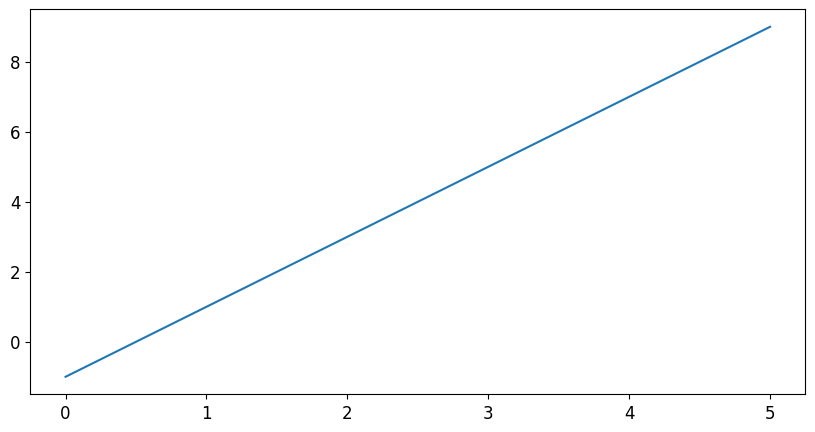

In [ ]:
plot(x,y)

Mais on aime aussi mettre des légendes et des labels sur les axes:

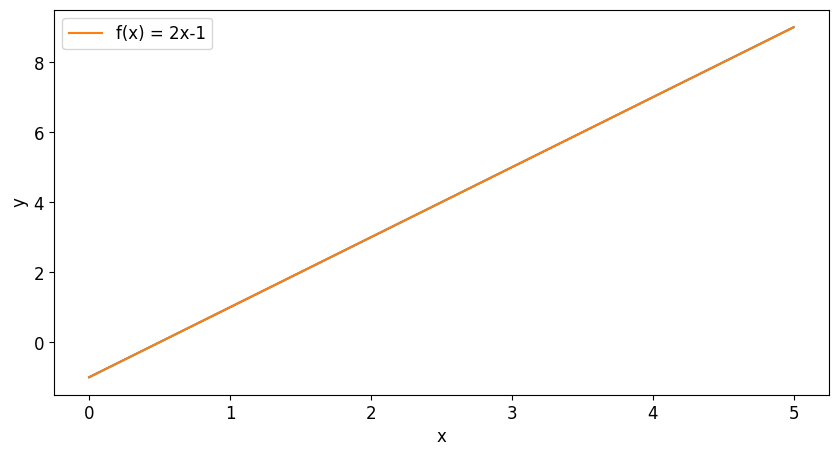

In [ ]:
plot(x,y)
xlabel('x')
ylabel('y')
plot(x,y, label='f(x) = 2x-1')
legend()

On peut aussi tracer des graphes à deux dimensions (sous formes d'images en couleur). On va tracer une Gaussienne à deux dimensions, centrés en 0 et de largeur 1 en x et 2 en y (21 points entre -10 et 10 pour chacun des axes).

In [ ]:
minx = -10.
maxx = 10.
npts = 21
sigmax = 1.
sigmay = 2.

x = np.linspace(minx, maxx, npts)
y = np.linspace(minx, maxx, npts)
z = np.zeros((npts, npts))   #notez la syntaxe pour deux dimensions: deux parenthèse car les dmensiosn snt données sous la forme d'un "tuple"

for i in range(npts):
  for j in range(npts):
    z[j, i] = np.exp( -0.5 * ( (x[i]/sigmax)**2 + (y[j]/sigmay)**2))
    ### Notez ci-dessus l'inversion entre j et i car les tableaux de python sont en colonne-ligne... c'est la vie :-(
print(z)

[[7.18778174e-28 9.60268005e-24 4.71949527e-20 8.53304763e-17
  5.67568523e-14 1.38879439e-11 1.25015287e-09 4.13993772e-08
  5.04347663e-07 2.26032941e-06 3.72665317e-06 2.26032941e-06
  5.04347663e-07 4.13993772e-08 1.25015287e-09 1.38879439e-11
  5.67568523e-14 8.53304763e-17 4.71949527e-20 9.60268005e-24
  7.18778174e-28]
 [7.72759363e-27 1.03238540e-22 5.07393559e-19 9.17389075e-16
  6.10193668e-13 1.49309468e-10 1.34404100e-08 4.45085250e-07
  5.42224837e-06 2.43008313e-05 4.00652974e-05 2.43008313e-05
  5.42224837e-06 4.45085250e-07 1.34404100e-08 1.49309468e-10
  6.10193668e-13 9.17389075e-16 5.07393559e-19 1.03238540e-22
  7.72759363e-27]
 [6.47023493e-26 8.64405711e-22 4.24835426e-18 7.68120469e-15
  5.10908903e-12 1.25015287e-09 1.12535175e-07 3.72665317e-06
  4.53999298e-05 2.03468369e-04 3.35462628e-04 2.03468369e-04
  4.53999298e-05 3.72665317e-06 1.12535175e-07 1.25015287e-09
  5.10908903e-12 7.68120469e-15 4.24835426e-18 8.64405711e-22
  6.47023493e-26]
 [4.21912316e-25

On trace maintenant l'image avec `imshow()` de `matplotlib`:

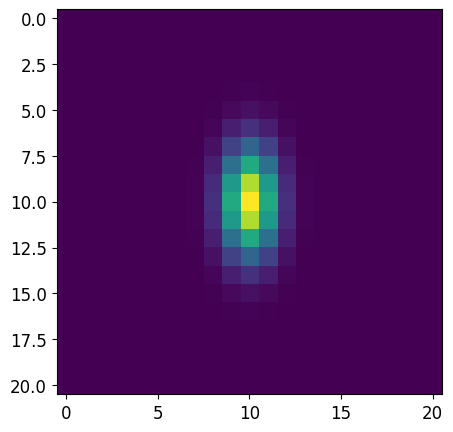

In [ ]:
imshow(z)

On voit que les axes ne sont pas satisfaisants, ce sont simplement les indices des éléments. Il faut aller dans la doc de `imshow()` pour trouver ce qu'il convient de faire.

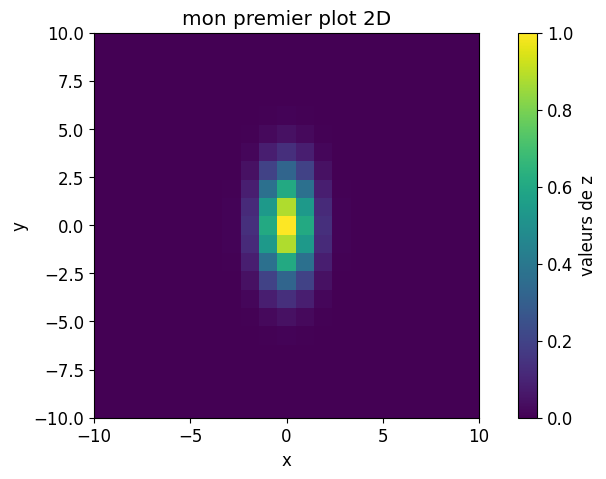

In [ ]:
imshow(z, extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
xlabel('x')
ylabel('y')
title('mon premier plot 2D')
colorbar(label='valeurs de z')

Ou l'on a ajouté un titre, des axez et aussi une `colorbar()` sur le côté.

On aurait pu tout calculer beaucoup plus facilement, et avec bcp plus de points, en utilisant les opérations sur les tableaux:

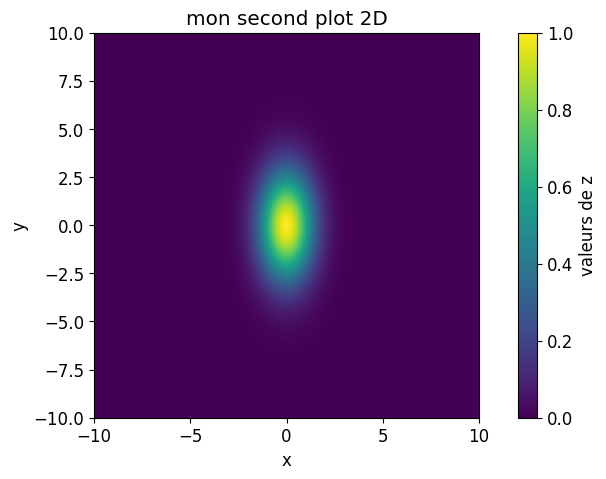

In [ ]:
minx = -10.
maxx = 10.
npts = 201
sigmax = 1.
sigmay = 2.

x = np.linspace(minx, maxx, npts)
y = np.linspace(minx, maxx, npts)

x2d, y2d = np.meshgrid(x,y)  # produit des tableaux à 2D de valeurs pour x et y en les répliquant comme il faut

z = np.exp(-0.5 * ((x2d/sigmax)**2 + (y2d/sigmay)**2))
imshow(z, extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
xlabel('x')
ylabel('y')
title('mon second plot 2D')
colorbar(label='valeurs de z')

On pourrait aussi très facilement ajouter des contours sur cette image 2D, par exemple tous les 0.25 en z:

Text(0.5, 1.0, 'mon second plot 2D')

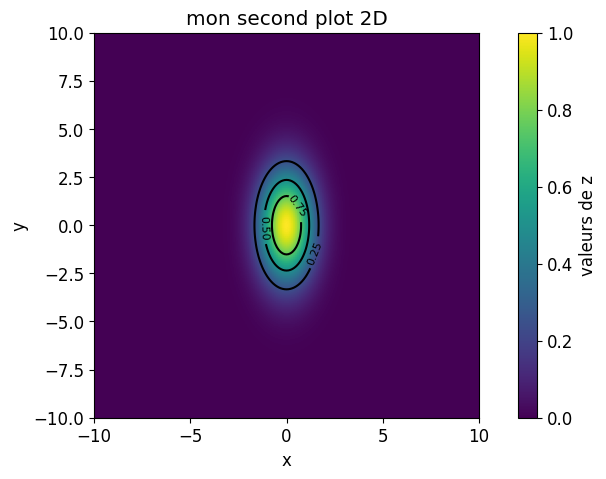

In [ ]:
imshow(z, extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
colorbar(label='valeurs de z')
clabel(contour(x2d, y2d, z, levels=np.linspace(0.,1,5), colors='k'), fontsize=8)
xlabel('x')
ylabel('y')
title('mon second plot 2D')


On peut maintenant commencer à faire de la cosmologie !

## Densités en fonction du décalage vers le rouge

Nous allons maintenant réaliser notre premier graphique, qui est lié à la cosmologie. Nous voulons tracer l'évolution de la densité de différentes espèces (Radiation, Matière et Constante cosmologique) en fonction du décalage vers le rouge. Nous utilisons les valeurs suivantes pour les différentes densités telles qu'exprimées aujourd'hui:

In [ ]:
h_0 = 0.7
omega_l_0 = 0.7
omega_r_0 = 4.3 * h_0**(-2) * 1e-5
omega_m_0 = 0.3 - omega_r_0

On rappelle que: $$\Omega(z) = \Omega_r (1 + z)^4 + \Omega_m (1 + z)^3 + \Omega_\Lambda$$

Nous définissons un tableau contenant les décalages vers le rouge que nous voulons observer, avec un espacement logarithmique entre 1e-1 et 1e4 et 1000 éléments.

In [ ]:
z = np.logspace(-1, 4, 1000)

### Imprimons les 10 premiers éléments
print(z[0:10])

[0.1        0.10115911 0.10233166 0.1035178  0.10471768 0.10593148
 0.10715934 0.10840144 0.10965793 0.11092899]


Nous pouvons calculer directement les densités en utilisant le tableau des décalages vers le rouge comme suit:

In [ ]:
om_r = omega_r_0 * (1 + z)**4
om_m = omega_m_0 * (1 + z)**3
# L'opération ci-dessous est une simple astuce permettant d'avoir une table de
# om_l avec le même nombre d'éléments que les autres
om_l = omega_l_0 + z*0
total = om_r + om_m + om_l

Traçons maintenant notre premier graphique rerpésentant les densités et leur somme en fonction du redshift.

Text(0.5, 1.0, 'Densities as a function of Redshift')

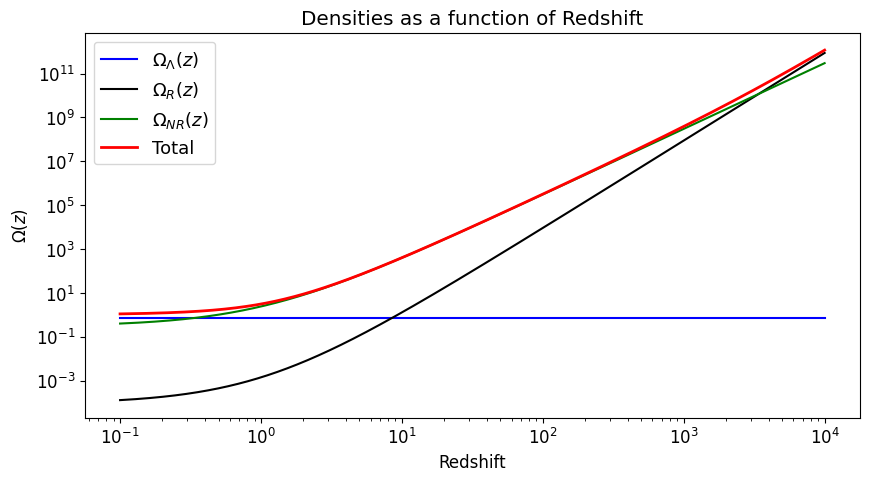

In [ ]:
rc('figure',figsize=(10,5))
xscale('log')
yscale('log')
xlabel('Redshift')
ylabel(r'$\Omega(z)$')
plot(z,om_l, 'b', label = r'$\Omega_\Lambda(z)$')
plot(z,om_r, 'k', label = r'$\Omega_R(z)$')
plot(z,om_m, 'g', label = r'$\Omega_{NR}(z)$')
plot(z,total, 'r', lw=2, label = 'Total')
legend(loc='upper left', fontsize=13)
title('Densities as a function of Redshift')

***Question 1:*** Trouvez numériquement les valeurs de redshift de l'égalité matière-rayonnement et de la domination par $\Lambda$, enregistrez-les dans une variable et affichez les valeurs.

In [ ]:
### Tapez votre code ici
zl = np.max(z[om_l > (om_m)])
zeq = np.max(z[ om_m > om_r])
print(zl)
print(zeq)

0.3239742629528197
3384.772855945983


***Question 2:*** Maintenant, refaites le graphique initial et matérialisez avec des lignes verticales en pointillés les valeurs que vous avez trouvées précédemment. On vous demande aussi d'afficher les décalages vers le rouge que vous avez trouvés dans la légende en utilisant le formatage de sortie de Python.

Voici un exemple pour imprimer $\pi$ avec un maximum de 6 caractères et 2 chiffres après la virgule:
```
print('pi vaut {0:6.2f}'.format(np.pi))
```

Text(0.5, 1.0, 'Densities as a function of Redshift')

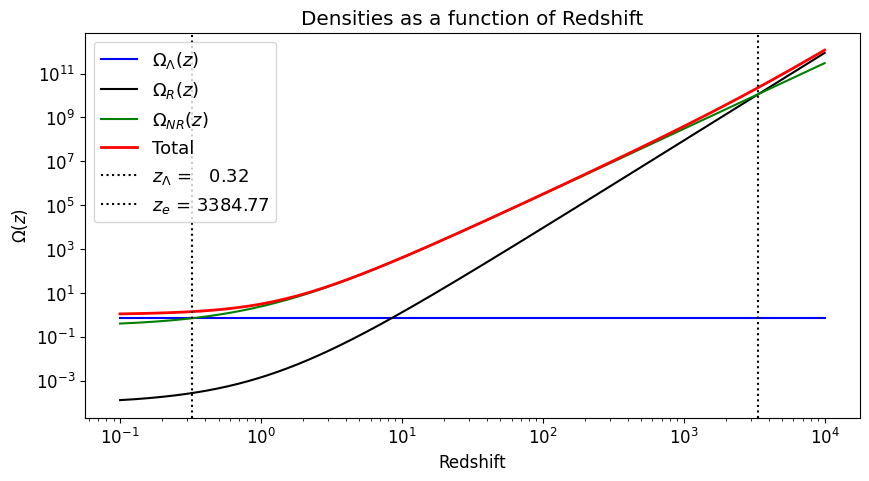

In [ ]:
### Tapez votre code ici
xscale('log')
yscale('log')
xlabel('Redshift')
ylabel(r'$\Omega(z)$')
plot(z,om_l, 'b', label = r'$\Omega_\Lambda(z)$')
plot(z,om_r, 'k', label = r'$\Omega_R(z)$')
plot(z,om_m, 'g', label = r'$\Omega_{NR}(z)$')
plot(z,total, 'r', lw=2, label = 'Total')
axvline(x=zl, ls=':', color='k', label = '$z_\Lambda$ = {0:6.2f}'.format(zl))
axvline(x=zeq, ls=':', color='k', label = r'$z_e$ = {0:6.2f}'.format(zeq))
legend(loc='upper left', fontsize=13)
title('Densities as a function of Redshift')

Notez la manière d'ajouter des valeurs numériques à partir d'une variable dans le graphique. Cela sera utile plus tard.

Maintenant, vous savez comment faire un graphique simple à partir d'un tableau, et comment manipuler des tableaux et effectuer des opérations avec eux.


## Distances cosmologiques



### Quelques rappels

Rappelons que les distances en cosmologie ne sont pas aussi simples que dans notre vie quotidienne en raison de l'effet de l'expansion de l'Univers. On doit calculer les distances sur la variété courbée et en expansion dont la métrique est donnée par la métrique de Friedman-Lemaître-Robertson-Walker :
$$ds^2 = dt^2 - a^2(t)\left[\frac{dr^2}{1-kr^2} + r^2 d\theta^2 + r^2\sin^2\theta d\phi^2\right]$$  
où nous avons fixé $c=1$ et $k$ est le paramètre de courbure et peut prendre les valeurs -1, 0 ou 1 correspondant respectivement aux Univers ouverts, plats et fermés.

La différence de coordonnées spatiales radiales entre un point à 0 et un point de rayon $r$ est :
$$\Delta r(z) = \int_0^r \frac{dr'}{\sqrt{1-kr'^2}}$$

Four un photon, le voyage se fait à la vitesse de la lumière quel que soit le référentiel (principe de la relativité) et l'invariant $ds^2$ est donc égal à zéro :
$$ds^2 = 0 = dt^2-a^2\frac{dr^2}{1-kr^2}$$
de sorte que
$$\frac{dr}{\sqrt{1-kr^2}}=\frac{dt}{a}$$
Nous rappelons également la définition du décalage vers le rouge :  $$1+z = \frac{a0}{a}$$ et en dérivant par rapport au temps :
$$\frac{dz}{dt}= -\dot{a}\frac{a_0}{a^2}$$ impliquant $$\frac{dt}{a} = -\frac{dz}{a_0}\times\frac{a}{\dot{a}}$$, puis en introduisant le paramètre de Hubble $H=\frac{\dot{a}}{a}$, nous pouvons réécrire la différence de coordonnées comme :
$$\Delta r(z) = \frac{1}{a_0}\int_0^z \frac{dz'}{H(z')}$$.

En multipliant cette différence de coordonnées par le facteur d'échelle aujourd'hui $a_0$, on obtient la distance propre comobile : $$D_P(z) = a_0 \Delta r(z) = \int_0^z \frac{dz'}{H(z')}$$

Cette dernière peut être multipliée par $1+z$ pour obtenir la distance de luminosité ou divisée par $1+z$ pour obtenir la distance angulaire.

### Calcul de la distance de luminosité
Nous allons d'abord calculer et tracer H(z) avec 1000 valeurs de z entre 0 et 1 espacées linéairement (la fonction à utiliser est linspace()) en utilisant la formule du cours pour H(z) et les paramètres cosmologiques définis aux mêmes valeurs que ci-dessus. Vous pouvez également jouer avec les paramètres cosmologiques pour voir les changements. Nous rappelons que $$H(z)=H_0\sqrt{\Omega_k(1 + z)^2 + \Omega_\Lambda + \Omega_m (1 + z)^3}$$

***Question 3:*** Faites-le vous-même dans la cellule suivante, la variable H(z) doit être appelée "hz". Vous êtes ensuite prié de tracer H en fonction de z. N'oubliez pas de mettre des étiquettes sur vos axes ainsi qu'une légende. Vous aurez besoin de choisir une valeur pour la constante de Hubble, par exemple 70 km/sec/Mpc.

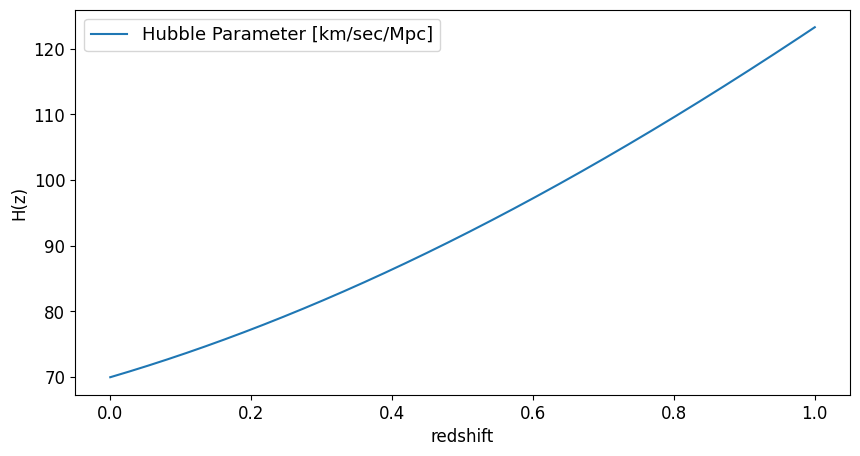

In [ ]:
### Tapez votre code ici
z = np.linspace(0,1,1000)
omega_m = 0.3
omega_l = 0.7
omega_tot = omega_m + omega_l
omega_k = 1. - omega_tot
H0 = 70. #km/sec/Mpc
hz = H0 * np.sqrt(omega_k * (1 + z)**2 + omega_l + omega_m * (1 + z)**3)
plot(z, hz, label='Hubble Parameter [km/sec/Mpc]')
xlabel('redshift')
ylabel('H(z)')
legend(fontsize=13)

Maintenant, nous calculons la distance de luminosité $$D_l(z) = c(1+z)\int_0^z \frac{\mathrm{d}z'}{H(z')}$$ en utilisant les fonctionnalités d'intégration numérique de la bibliothèque `scipy` (intégrale cumulative trapézoïdale), et sans oublier de remettre la vitesse de la lumière en km/sec afin d'avoir à la fin de Mpc (puisque la contante de Hubble est en km/sec/Mpc) :

In [ ]:
import scipy.integrate
dp = np.zeros(len(z))
dp[1:] = scipy.integrate.cumtrapz(1./hz, z) * 3e5

***Question 4:*** Vous êtes invité à tracer la distance de luminosité en fonction du décalage vers le rouge dans la cellule suivante (rappelez-vous que $D_L(z) = (1+z)\times D_p(z)$). Vous appellerez la variable contenant la distance de luminosité `dl`:

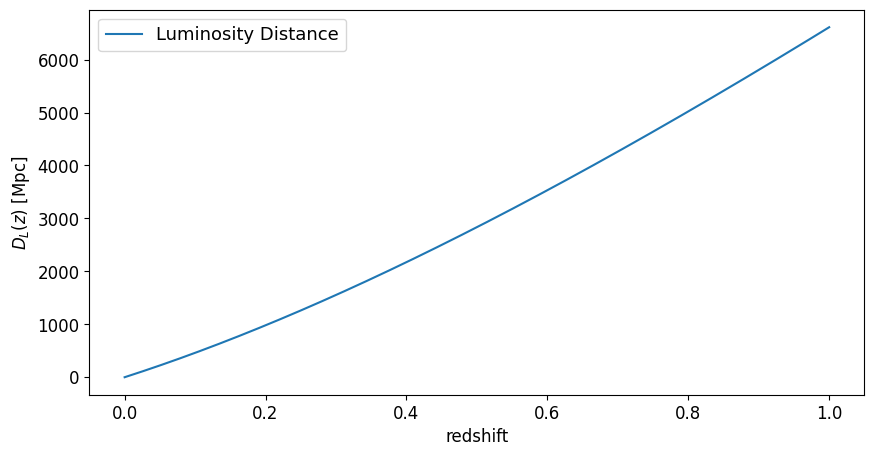

In [ ]:
### Tapez votre code ici
dl = (1+z) * dp
plot(z, dl, label='Luminosity Distance')
xlabel('redshift')
ylabel('$D_L(z)$ [Mpc]')
legend(fontsize=13)

### Utilisation de la bibliothèque cosmolib
Afin de simplifier nos vies, j'ai préparé une bibliothèque pour le cours appelée `cosmolib.py` qui se trouve dans le même répertoire. Je vous encourage à examiner les différents codes que nous utiliserons à partir de cette bibliothèque afin de voir comment de tels outils peuvent être simplement codés.

La bibliothèque nécessite l'installation préalable de deux bibliothèques publiques : `emcee` et `iminuit`

In [ ]:
!pip install emcee
!pip install iminuit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.0/416.0 kB 2.9 MB/s eta 0:00:00


Voici comment récupérer le fichier `cosmolib.py` depuis `GitHub` directement en utilisant `Google Colaboratory`.

Notez que nous commençons par supprimer une éventuelle version du fichier dans le répertoire local de Google Colab, puis nous le téléchargeons en utilisant wget, et enfin nous listons le contenu du répertoire. Toutes ces commandes sont des commandes Unix typiques qui sont exécutées depuis Google Colaboratory en ajoutant un point d'exclamation pour lui indiquer qu'il doit exécuter des commandes Unix :

In [ ]:
!rm -rf cosmolib.py*
!wget --no-check-certificate https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/cosmolib.py
!ls -lrt

--2024-02-07 16:06:28--  https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/cosmolib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15811 (15K) [text/plain]
Saving to: ‘cosmolib.py’

cosmolib.py         100%[===================>]  15.44K  --.-KB/s    in 0s      

2024-02-07 16:06:28 (40.4 MB/s) - ‘cosmolib.py’ saved [15811/15811]

total 20
drwxr-xr-x 1 root root  4096 Feb  5 20:33 sample_data
-rw-r--r-- 1 root root 15811 Feb  7 16:06 cosmolib.py


Maintenant, importons la bibliothèque et attribuons-lui l'espace de noms (namespace) `cs` afin que chaque fois que nous appellerons l'une de ses fonctions, ce sera comme suit :
```
cs.myfunction()
```



In [ ]:
import cosmolib as cs

Il contient une fonction, appelée `cs.lumdist()` pour les distances de luminosité qui est légèrement plus précise que celle que nous avons calculée ci-dessus, mais les différences sont très petites.

Elle est appelée de la manière suivante, qui utilise un "dictionnaire python" pour spécifier la valeur des paramètres cosmologiques. Les trois paramètres qui sont acceptés sont :
- *h* pour la constante de Hubble à un décalage vers le rouge de 0 divisée par 100
- *omega_M_0* pour $\Omega_m$ aujourd'hui à un décalage vers le rouge de 0
- *omega_lambda_0* pour $\Omega_\Lambda$ à un décalage vers le rouge de 0
- *w0* pour l'équation d'état de l'Énergie Sombre. (non traitée en cours).

**Remarque:** L'équation d'état de l'Énergie Sombre n'a pas été discutée dans les cours en raison du manque de temps. Cependant, c'est l'un des principaux défis de la cosmologie observationnelle de la mesurer aujourd'hui. Les SNIa sont une sonde sensible pour ce paramètre. L'équation d'état est le rapport entre la pression et la densité de l'Énergie Sombre (comme pour un gaz parfait). Cependant, dans le cas de l'Énergie Sombre ou de la Constante Cosmologique, le rapport est négatif (vous avez besoin d'une pression négative pour avoir une expansion accélérée comme on peut le voir dans la deuxième équation de Friedman - voir les cours). Pour une constante cosmologique parfaite w=0 et pour les modèles d'Énergie Sombre, elle peut avoir d'autres valeurs, et éventuellement varier avec le décalage vers le rouge. Ne vous inquiétez pas de cela maintenant et contentez-vous de le fixer à -1.

In [ ]:
z = np.linspace(0,1,1000)
cosmo_lcdm = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.7, 'w0':-1.}
dlnew = cs.lumdist(z, cosmo_lcdm)

Comme vous pouvez le constater, les valeurs des paramètres cosmologiques sont spécifiées à l'aide d'un dictionnaire Python, un outil très utile en Python lorsque l'on a besoin de contenants de différents types de données avec des étiquettes pour chacun.

***Question 5:*** Dans la cellule suivante, vous devez superposer les deux distances de luminosité que nous avons calculées (si vous voulez jouer, vous pouvez également examiner la différence ou la différence relative entre les deux).

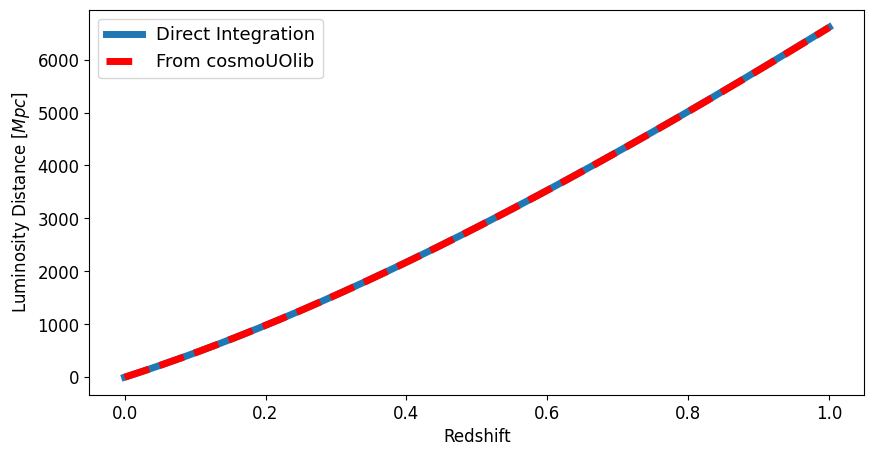

In [ ]:
### Tapez votre code ici
plot(z, dl, lw=5, label = 'Direct Integration')
plot(z, dlnew, 'r--', lw=5, label = 'From cosmoUOlib')
xlabel('Redshift')
ylabel('Luminosity Distance [$Mpc$]')
legend(loc='upper left', fontsize=13)

### Angular distance:
Similarly to the luminosity distance, the cosmolib library has a angdist() function that is called the same way. We calculate it and compare to the previously calculated luminsotity distance in the following cell:

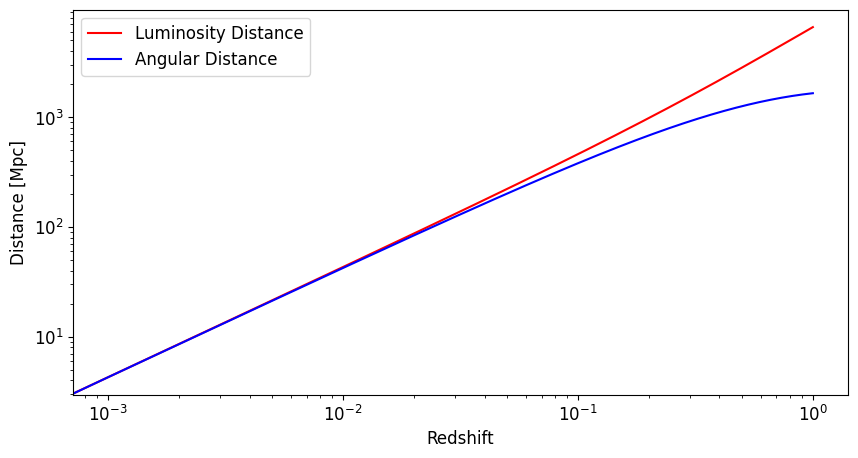

In [ ]:
dang = cs.angdist(z, cosmo_lcdm)
plot(z, dlnew, 'red', label='Luminosity Distance')
plot(z, dang, 'blue', label='Angular Distance')
xlabel('Redshift')
ylabel('Distance [Mpc]')
legend()
xscale('log')
yscale('log')

### Superposition des modèles cosmologiques aux données observationnelles :
Supposons que vous ayez réalisé une expérience qui a mesuré les distances angulaires (en utilisant les oscillations acoustiques baryoniques) à différents décalages vers le rouge et obtenu les mesures suivantes (celles-ci sont extraites de l'expérience SDSS-3 Boss https://arxiv.org/abs/1607.03155 avec une légère conversion pour vous faciliter la tâche) :

| Redshift | Distance angulaire [Mpc] | Incertitude sur $D_A$ [Mpc] |
| --- | --- | --- |
| 0.38 | 1081 | 15 |
| 0.51 | 1276 | 19 |
| 0.61 | 1370 | 26 |

Ces données peuvent être représentées de la manière suivante:

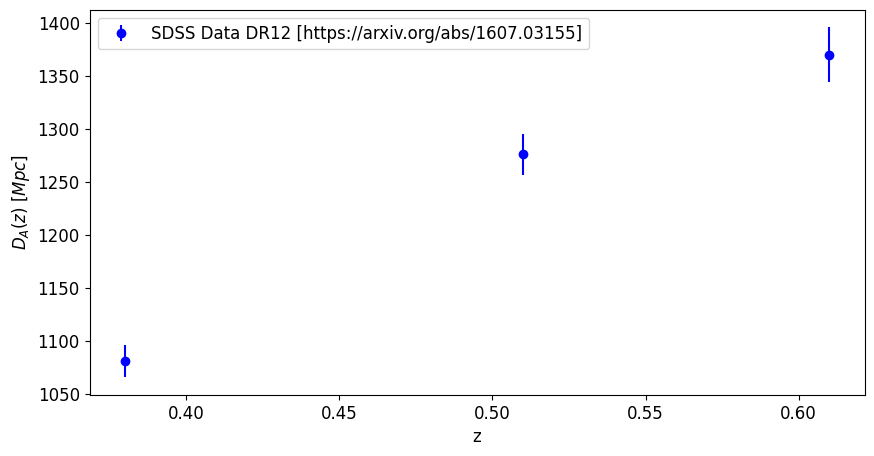

In [ ]:
z_bao = np.array([0.38, 0.51, 0.61])
dang_bao = np.array([1081., 1276., 1370.])
err_dang_bao = np.array([15., 19., 26.])
errorbar(z_bao, dang_bao, yerr=err_dang_bao, fmt='bo', label='SDSS Data DR12 [https://arxiv.org/abs/1607.03155]')
xlabel('z')
ylabel('$D_A(z)~[Mpc]$')
legend(loc='upper left')

**Question 6:** Superposez les modèles théoriques pour trois ensembles de paramètres cosmologiques :


1.   $\Lambda$CDM avec h=0.7, $\Omega_m$=0.3, $\Omega_\Lambda$=0.7 (et $w$=-1)
2.   Le modèle dit "ouvert" avec h=0.7, $\Omega_m$=0.3, $\Omega_\Lambda$=0.0 (et $w$=-1)
3.   Le modèle dit "plat" avec  h=0.7, $\Omega_m$=1.0, $\Omega_\Lambda$=0. (et $w$=-1)

[NB : Le modèle 3 est appelé "plat" dans le sens "plat sans $\Lambda$" car vous avez tous remarqué que $\Lambda$CDM est également plat.]



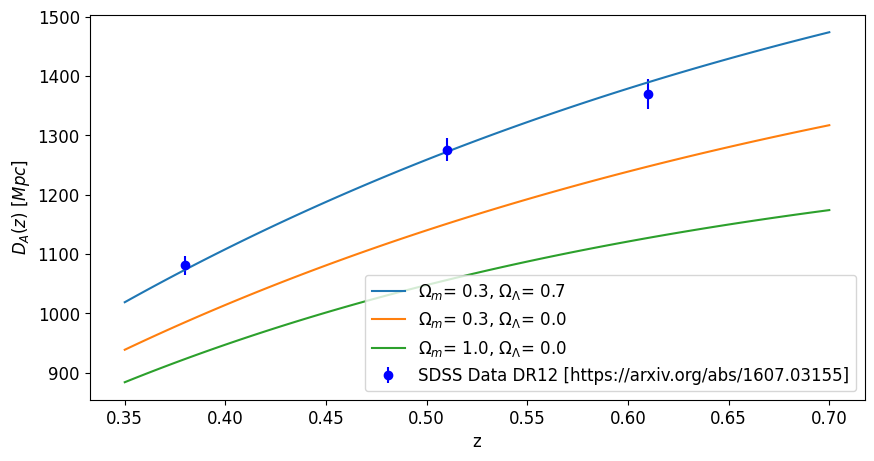

In [ ]:
### Tapez votre code ici
z_bao = np.array([0.38, 0.51, 0.61])
dang_bao = np.array([1081., 1276., 1370.])
err_dang_bao = np.array([15.4, 18.9, 25.9])
errorbar(z_bao, dang_bao, yerr=err_dang_bao, fmt='bo', label='SDSS Data DR12 [https://arxiv.org/abs/1607.03155]')
xlabel('z')
ylabel('$D_A(z)~[Mpc]$')

zvals = np.linspace(0.35, 0.7, 100)
cosmo_lcdm = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.7, 'w0':-1.}
plot(zvals, cs.angdist(zvals, cosmo_lcdm),
     label='$\Omega_m$={0:4.1f}, $\Omega_\Lambda$={1:4.1f}'.format(cosmo_lcdm['omega_M_0'], cosmo_lcdm['omega_lambda_0']))

cosmo_open = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.0, 'w0':-1.}
plot(zvals, cs.angdist(zvals, cosmo_open),
     label='$\Omega_m$={0:4.1f}, $\Omega_\Lambda$={1:4.1f}'.format(cosmo_open['omega_M_0'], cosmo_open['omega_lambda_0']))

cosmo_flat = {'h':0.7, 'omega_M_0':1.0, 'omega_lambda_0':0.0, 'w0':-1.}
plot(zvals, cs.angdist(zvals, cosmo_flat),
     label='$\Omega_m$={0:4.1f}, $\Omega_\Lambda$={1:4.1f}'.format(cosmo_flat['omega_M_0'], cosmo_flat['omega_lambda_0']))
legend()

Vous devriez remarquer ici que $\Lambda$CDM fonctionne beaucoup mieux, mais vous pouvez également remarquer que le fait de changer la constante de Hubble-Lemaître à d'autres valeurs (autour de 0.6 - 0.65) dans les deux autres modèles donne des prédictions qui sont en assez bon accord avec les données. Cela montre une dégénérescence inhérente entre les paramètres cosmologiques qui ne peut être levée que par la combinaison de différentes sondes cosmologiques (BAO comme ici, les supernovae de type Ia et le CMB).

## Calcul de l'âge de l'Univers

De manière similaire au calcul de la distance, on peut calculer le temps écoulé depuis un décalage vers le rouge donné (nous avons utilisé des changements de variables similaires à ceux ci-dessus) :
$$t(z) = \int_t^{t0} dt' = \int_0^z \frac{dz'}{(1+z')H(z')}$$

Calculer cette intégrale de 0 à l'infini donne l'âge de l'Univers pour un modèle cosmologique donné. Vous pouvez implémenter votre propre calcul de l'âge de l'Univers ou utiliser la fonction disponible dans la bibliothèque cosmolib : `age [Gyr] = cs.lookback(z, cosmo)`

où z peut être simplement une valeur ou un tableau `numpy` de décalages vers le rouge et `cosmo` est un dictionnaire donné de la manière suivante :


In [ ]:
cosmo_lcdm = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.7, 'w0':-1.}

Calculons le temps écoulé entre le redshift 0.1 et aujourd'hui

In [ ]:
print(cs.lookback(0.1, cosmo_lcdm))

1.3015743503698538


Et calculons à présent le temps écoulé depuis plusieurs redshifts, stockés dans une tableau `numpy`L

In [ ]:
zvalues = np.array([0.1, 1, 10])
print(cs.lookback(zvalues, cosmo_lcdm))

[ 1.30157435  7.71697782 13.0038611 ]


***Question 7:*** Dans la cellule suivante, calculez le temps écoulé entre aujourd'hui et 1000 décalages vers le rouge répartis de manière logarithmique entre $10^{-4}$ et $10^4$ pour le modèle cosmologique standard $\Lambda$CDM et représentez-le en fonction du décalage vers le rouge.

Text(0, 0.5, 'Lookback time [Gyr]')

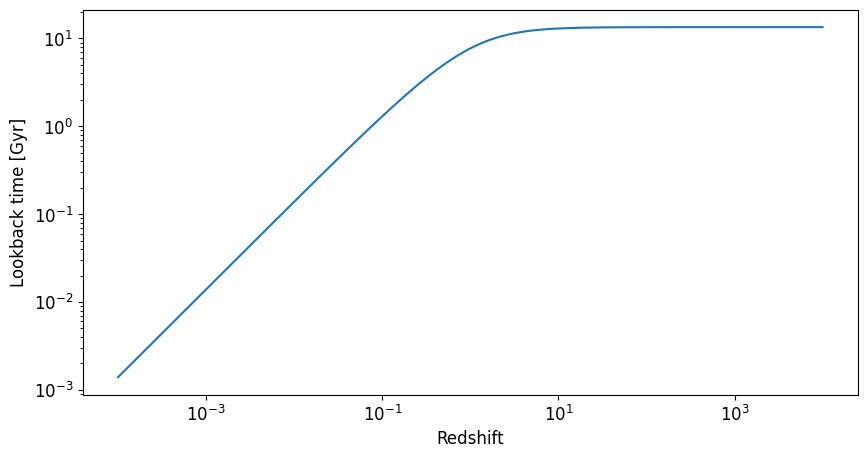

In [ ]:
### Tapez votre code ici
z = np.logspace(-4, 4, 1000)
cosmo_lcdm = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.7, 'w0':-1.}
lb = cs.lookback(z, cosmo_lcdm)
clf()
plot(z,lb)
yscale('log')
xscale('log')
xlabel('Redshift')
ylabel('Lookback time [Gyr]')

***Question 8:*** Vous devriez remarquer qu'au-delà de $𝑧=10$ , le temps écoulé atteint son maximum, l'âge de l'Univers dont la valeur est donc le maximum de ce tableau. Vous êtes censé l'afficher dans la cellule suivante :

In [ ]:
### Tapez votre code ici
np.max(lb)

13.469830331616736

Vous allez maintenant calculer cet âge en fonction des paramètres cosmologiques. Pour cela, vous devrez effectuer des boucles et utiliser des tableaux bidimensionnels.

**Question 9 :** Calculez l'âge de l'Univers en fonction de la densité de matière (30 ou 100 valeurs entre 0 et 1) et de la densité de la constante cosmologique (30 ou 100 valeurs entre 0 et 1,5). Pour chaque couple de valeurs, vous calculerez l'âge de l'Univers et remplirez un tableau 2D. Ensuite, vous représenterez cet âge à l'aide d'un graphique 2D en couleur en utilisant la fonction `imshow()` de `matplotlib`. N'oubliez pas d'ajouter des axes corrects, un titre et des étiquettes sur les axes. Vous ajouterez également une barre de couleur à côté de l'image en appelant la fonction `colorbar()` juste après votre graphique 2D.

0


/content/cosmolib.py:28: RuntimeWarning: invalid value encountered in sqrt
  e_z=np.sqrt(omegak*(1+z)**2+omegaxz+omegam*(1+z)**3)
/content/cosmolib.py:86: RuntimeWarning: divide by zero encountered in divide
  cumulative[1:]=scipy.integrate.cumtrapz(1./e_z(zvals,cosmo)/(1+zvals),zvals)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


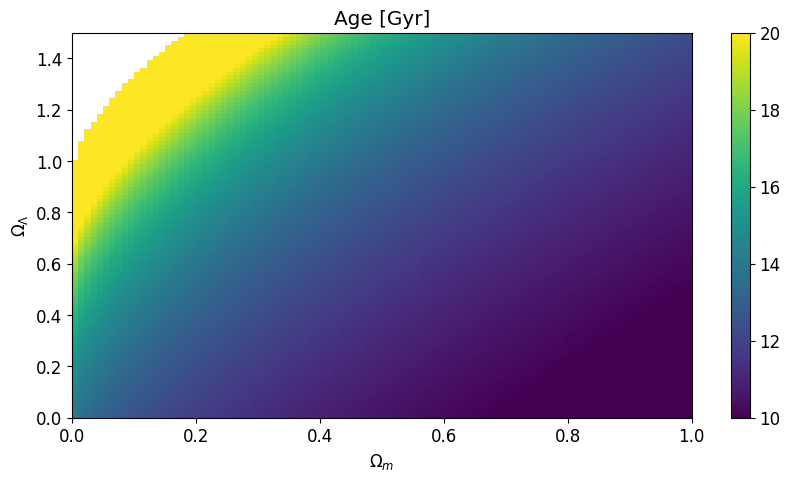

In [ ]:
### Tapez votre code ici
nn=100
age = np.zeros((nn,nn))
omvals = np.linspace(0,1,nn)
olvals = np.linspace(0,1.5,nn)
for i in range(len(omvals)):
    print(i)
    for j in range(len(olvals)):
        cosmo = {'h':0.7, 'omega_M_0':omvals[i], 'omega_lambda_0':olvals[j], 'w0':-1.}
        age[i,j] = cs.lookback(1000, cosmo, zres=0.01)

imshow(age.T, interpolation='nearest', extent=[0,1,0,1.5], aspect='auto', origin='lower', vmin=10,vmax=20)
xlabel('$\Omega_m$')
ylabel('$\Omega_\Lambda$')
title('Age [Gyr]')
colorbar()

***Question 10:*** Vous êtes maintenant invité à refaire le même graphique en ajoutant :
- des contours pour différentes valeurs entières de l'âge de l'Univers (entre 0 et 20 GYr). Vous devriez utiliser les fonctions `contour()` et `contourf()` de `matplotlib` qui vous permettent respectivement de tracer et de remplir les contours avec des couleurs. Notez que ces fonctions attendent des tableaux 2D comme coordonnées x et y pour les valeurs à afficher, vous devrez donc construire des tableaux 2D à partir de vos tableaux x et y 1D en utilisant la fonction `np.meshgrid()`
- un contour supplémentaire (couleur différente) pour l'étoile HE1523-0901 dont l'âge a été mesuré à 13.2 Gyr
- Une étoile aux coordonnées correspondant au cosmologie $\Lambda CDM$ ($\Omega_m=0.3$, $\Omega_\Lambda=0.7$)
- Un point dans une couleur donnée pour l'Univers ouvert sans $\Lambda$ ($\Omega_m=0.3$, $\Omega_\Lambda=0$)
- Un point dans une autre couleur pour l'univers plat sans $\Lambda$ ($\Omega_m=1$, $\Omega_\Lambda=0$)

Et bien sûr, inclure tout cela dans une légende.

Pour les contours, utilisez les fonctions `contour()` et `contourf()` de `Matplotlib`.

À la fin, vous devriez obtenir le graphique suivant, qui semble pouvoir être publié dans un article...  ![ageUniverse](http://www.apc.univ-paris7.fr/Downloads/cosmobs/JCH/CentraleSupelec/age.png)

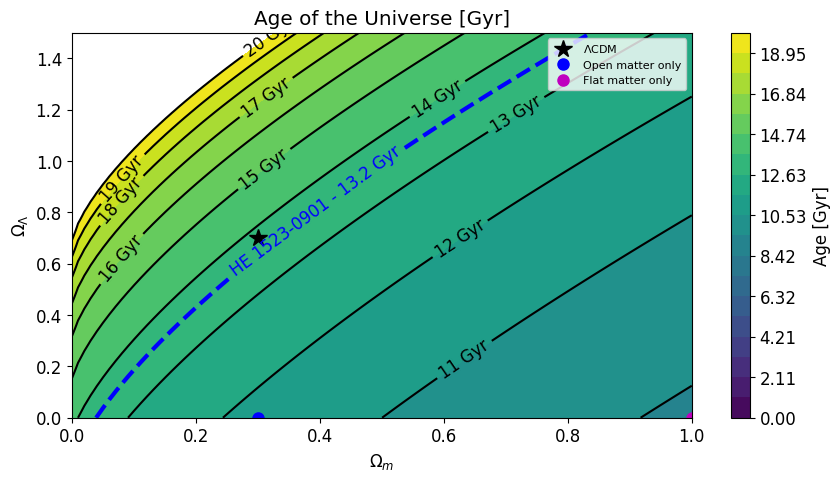

In [ ]:
### Tapez votre code ici
### Fabriquer des images 2D des abscisses et des ordonnées pour soit une table des x_i,j et y_i,j pour chaque age_i,j
om2d, ol2d = np.meshgrid(omvals, olvals)

### Nombre de niveaux de contours à tracer
rc('figure',figsize=(10,5))
niveaux = linspace(0,20,20)
contourf(om2d, ol2d, age.T, levels=niveaux)
colorbar(label='Age [Gyr]')
clabel(contour(om2d, ol2d, age.T, levels=niveaux, colors='k'), fmt='%.0f Gyr', fontsize=12)
xlabel('$\Omega_m$')
ylabel('$\Omega_\Lambda$')
title('Age of the Universe [Gyr]')
clabel(contour(om2d, ol2d, age.T,levels=[13.2], colors='b',linewidths=3, linestyles='--'),fmt='HE 1523-0901 - %.1f Gyr', fontsize=12)
plot(0.3, 0.7, 'k*',ms=13, label = '$\Lambda$CDM')
plot(0.3, 0., 'bo', ms=8, label = 'Open matter only')
plot(1, 0, 'mo',ms=8, label = 'Flat matter only')
legend(loc='upper right', numpoints=1, framealpha=0.8, fontsize=8)

Fin du Notebook 1